In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import sleep
import os
import pywt
import warnings
import sklearn
from tensorflow.keras import optimizers
from tensorflow.keras import layers
from keras_preprocessing.sequence import pad_sequences
import keras
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import optimizers
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
%matplotlib inline
warnings.filterwarnings("ignore",category=np.VisibleDeprecationWarning)

In [2]:
dirC="./Datasets/setC/"
tempC=[]
for file in os.listdir(dirC):
    fl = dirC + file
    tempC.append(fl)
tempC = sorted(tempC)

dirE="./Datasets/setE/"
tempE=[]
for file in os.listdir(dirE):
    fl = dirE + file
    tempE.append(fl)
tempE = sorted(tempE)

In [3]:
tc=[]
st = 'A'
for i in range(len(tempC)):
    x = pd.read_table(tempC[i],header=None)
    x.columns=[st+str(i)]
    tc.append(x)
    
te=[]
st = 'A'
for i in range(len(tempE)):
    x = pd.read_table(tempE[i],header=None)
    x.columns=[st+str(i)]
    te.append(x)

In [4]:
def table(table):
    big_table=None
    for tf in table:
        big_table=pd.concat([big_table,tf],axis=1)
    return big_table

In [5]:
bigC=table(tc)
bigE=table(te)

head=list(bigE.columns.values)

In [6]:
len(bigC.columns)

100

In [7]:
def creat_mat(mat):
    matx = np.zeros((len(mat),(len(head))))
    for i in range(len(head)):
        matx[:,i] = mat[head[i]]
        sleep(0.01)
    return matx

In [8]:
matC=creat_mat(bigC)
matE=creat_mat(bigE)

In [9]:
matC=np.nan_to_num(matC)
matE=np.nan_to_num(matE)

In [10]:
matC.shape,matE.shape

((4097, 100), (4097, 100))

In [11]:
matC

array([[-42.,  50., -54., ..., -11.,  13., -62.],
       [-39.,  48., -56., ..., -23.,  22., -64.],
       [-35.,  45., -57., ..., -22.,  29., -62.],
       ...,
       [-37., -14., -38., ...,  16., -55.,  -1.],
       [-40.,  -9., -42., ...,  13., -46.,   0.],
       [-64., -37.,   5., ..., -29.,  -2.,  41.]])

In [12]:
matE

array([[ 100.,  340., -310., ..., -438., -476.,   23.],
       [ 124.,  353.,   93., ..., -561., -518.,  144.],
       [ 153.,  400.,  494., ..., -622., -521.,  228.],
       ...,
       [  57.,  512., -721., ..., -118.,  246., -155.],
       [  95.,  130., -491., ..., -163.,  556.,    6.],
       [ 462.,  196.,  910., ...,  -56.,  276., -221.]])

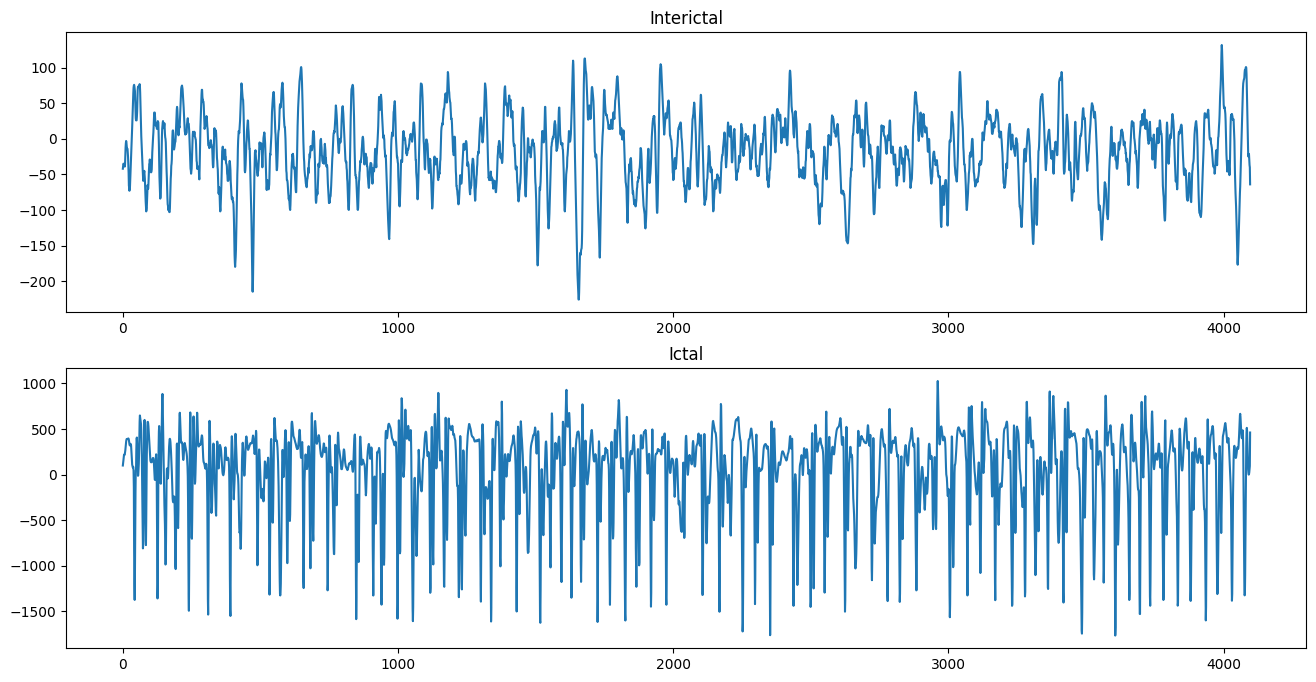

In [13]:
samples=np.arange(0,4097,1)
plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
plt.title('Interictal')
plt.plot(samples,matC[:,0],label='Interictal')
plt.subplot(2,1,2)
plt.title('Ictal')
plt.plot(samples,matE[:,0],label='Ictal')
plt.show()

In [14]:
feature_size = 8
columns_name = list()
for i in range(feature_size):
    columns_name = columns_name + ['f'+str(i+1)]
columns_name = columns_name + ['class']

In [15]:
def features(mat):
  Fs   = 173
  fft = np.fft.fft(mat)
  mat = np.fft.ifft(fft[0:1500])
  mat = abs(np.fft.ifft(fft[0:1000]))
  lis = list()
  lis = lis + [np.max(abs(fft))]
  lis = lis + [np.min(abs(fft))]
  lis = lis + [np.mean(abs(fft))]
  lis = lis + [np.std(abs(fft))]
  lis = lis + [np.max(mat)]
  lis = lis + [np.min(mat)]
  lis = lis + [np.mean(mat)]
  lis = lis + [np.std(mat)]
  sleep(0.01)
             
  return lis

In [16]:
MftC = np.zeros((100,feature_size + 1))

for i in range(100):
    MftC[i,:] = features(matC[:,i]) + [1]

In [17]:
MftE = np.zeros((100,feature_size + 1))

for i in range(100):
    MftE[i,:] = features(matE[:,i]) + [0]

In [18]:
len(MftC),len(MftE)

(100, 100)

In [19]:
FCM_C = pd.DataFrame(MftC,columns=columns_name)
FCM_E = pd.DataFrame(MftE,columns=columns_name)

In [20]:
TotalDataset = pd.concat([FCM_C,FCM_E],ignore_index=True)

In [21]:
TotalDataset

,f1,f2,f3,f4,f5,f6,f7,f8,class
0,72886.000000,4.740101,1162.631842,3148.603055,515.780251,3.827455,139.383073,79.320372,1.0
1,44488.190982,5.245204,1574.842502,3976.913262,782.890148,6.272206,165.048007,101.066014,1.0
2,60280.000000,3.558463,1187.368357,2836.556431,442.146657,2.203469,125.845383,72.975137,1.0
3,114634.000000,2.802925,1178.967729,3257.123132,516.340677,4.296319,158.979411,76.421653,1.0
4,73980.472922,29.009750,3844.764474,7038.394713,1321.432376,12.411132,319.865458,171.761400,1.0
...,...,...,...,...,...,...,...,...,...
195,182731.000000,4.140197,2964.034370,6900.671072,949.526909,7.628541,321.787517,169.284739,0.0
196,405933.567827,23.829796,12451.110052,33118.177387,3365.057684,584.042975,1497.708540,566.344367,0.0
197,206553.768555,13.807308,7000.972903,17431.403312,1554.877011,70.801519,785.302431,325.527149,0.0
198,186015.216714,22.248840,12069.225734,21179.101425,3292.508700,22.389188,897.583539,643.899324,0.0


In [22]:
X = TotalDataset[columns_name[:-1]]
Y = TotalDataset[['class']]
X = np.asarray(X)
Y = np.asarray(Y)

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [24]:
st_x= StandardScaler()  
X_train= st_x.fit_transform(X_train)
X_test= st_x.transform(X_test)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(160, 8)
(40, 8)
(160, 1)
(40, 1)


In [26]:
x_train=X_train.reshape(X_train.shape[0],8,1)
y_train=Y_train.reshape(Y_train.shape[0],1)
x_test=X_test.reshape(X_test.shape[0],8,1)
y_test=Y_test.reshape(Y_test.shape[0],1)

In [27]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 8, 1)
(40, 8, 1)
(160, 1)
(40, 1)


In [28]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

In [29]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(5, activation="softmax")(x)
    return keras.Model(inputs, outputs)

In [30]:
input_shape = x_train.shape[1:]

In [31]:
x_train.shape[1:]

(8, 1)

In [32]:
model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.1,
    dropout=0.1,
)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["sparse_categorical_accuracy"],
)
model.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True)]

history=model.fit(x_train,y_train,validation_split=0.2,epochs=200,batch_size=4,callbacks=callbacks,)

score=model.evaluate(x_test,y_test,batch_size=4)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8, 1)]               0         []                            
                                                                                                  
 layer_normalization (Layer  (None, 8, 1)                 2         ['input_1[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 multi_head_attention (Mult  (None, 8, 1)                 7169      ['layer_normalization[0][0]', 
 iHeadAttention)                                                     'layer_normalization[0][0]'] 
                                                                                              

                                                                    ']                            
                                                                                                  
 layer_normalization_6 (Lay  (None, 8, 1)                 2         ['tf.__operators__.add_5[0][0]
 erNormalization)                                                   ']                            
                                                                                                  
 multi_head_attention_3 (Mu  (None, 8, 1)                 7169      ['layer_normalization_6[0][0]'
 ltiHeadAttention)                                                  , 'layer_normalization_6[0][0]
                                                                    ']                            
                                                                                                  
 dropout_6 (Dropout)         (None, 8, 1)                 0         ['multi_head_attention_3[0][0]
          

Epoch 23/200
32/32 [==============================] - 0s 8ms/step - loss: 0.6276 - sparse_categorical_accuracy: 0.7031 - val_loss: 0.6732 - val_sparse_categorical_accuracy: 0.6250
Epoch 24/200
32/32 [==============================] - 0s 7ms/step - loss: 0.6404 - sparse_categorical_accuracy: 0.6953 - val_loss: 0.6680 - val_sparse_categorical_accuracy: 0.6875
Epoch 25/200
32/32 [==============================] - 0s 8ms/step - loss: 0.6633 - sparse_categorical_accuracy: 0.6484 - val_loss: 0.6671 - val_sparse_categorical_accuracy: 0.6250
Epoch 26/200
32/32 [==============================] - 0s 8ms/step - loss: 0.6271 - sparse_categorical_accuracy: 0.6719 - val_loss: 0.6623 - val_sparse_categorical_accuracy: 0.6250
Epoch 27/200
32/32 [==============================] - 0s 8ms/step - loss: 0.6033 - sparse_categorical_accuracy: 0.6797 - val_loss: 0.6578 - val_sparse_categorical_accuracy: 0.6250
Epoch 28/200
32/32 [==============================] - 0s 8ms/step - loss: 0.6566 - sparse_categorica

32/32 [==============================] - 0s 11ms/step - loss: 0.4729 - sparse_categorical_accuracy: 0.8047 - val_loss: 0.5100 - val_sparse_categorical_accuracy: 0.8438
Epoch 69/200
32/32 [==============================] - 0s 11ms/step - loss: 0.4884 - sparse_categorical_accuracy: 0.7812 - val_loss: 0.5061 - val_sparse_categorical_accuracy: 0.8438
Epoch 70/200
32/32 [==============================] - 0s 11ms/step - loss: 0.4563 - sparse_categorical_accuracy: 0.8047 - val_loss: 0.5054 - val_sparse_categorical_accuracy: 0.8438
Epoch 71/200
32/32 [==============================] - 0s 13ms/step - loss: 0.4756 - sparse_categorical_accuracy: 0.8047 - val_loss: 0.5010 - val_sparse_categorical_accuracy: 0.8438
Epoch 72/200
32/32 [==============================] - 0s 11ms/step - loss: 0.4839 - sparse_categorical_accuracy: 0.7734 - val_loss: 0.4985 - val_sparse_categorical_accuracy: 0.7500
Epoch 73/200
32/32 [==============================] - 0s 9ms/step - loss: 0.5074 - sparse_categorical_accura

32/32 [==============================] - 0s 12ms/step - loss: 0.3583 - sparse_categorical_accuracy: 0.8594 - val_loss: 0.3251 - val_sparse_categorical_accuracy: 0.9375
Epoch 114/200
32/32 [==============================] - 0s 10ms/step - loss: 0.3259 - sparse_categorical_accuracy: 0.8984 - val_loss: 0.3208 - val_sparse_categorical_accuracy: 0.9375
Epoch 115/200
32/32 [==============================] - 0s 10ms/step - loss: 0.3480 - sparse_categorical_accuracy: 0.8984 - val_loss: 0.3147 - val_sparse_categorical_accuracy: 0.9375
Epoch 116/200
32/32 [==============================] - 0s 12ms/step - loss: 0.3479 - sparse_categorical_accuracy: 0.8984 - val_loss: 0.3106 - val_sparse_categorical_accuracy: 0.9375
Epoch 117/200
32/32 [==============================] - 0s 11ms/step - loss: 0.3257 - sparse_categorical_accuracy: 0.8828 - val_loss: 0.3051 - val_sparse_categorical_accuracy: 0.9375
Epoch 118/200
32/32 [==============================] - 0s 11ms/step - loss: 0.3344 - sparse_categorical_

32/32 [==============================] - 0s 13ms/step - loss: 0.2025 - sparse_categorical_accuracy: 0.9375 - val_loss: 0.1519 - val_sparse_categorical_accuracy: 0.9688
Epoch 159/200
32/32 [==============================] - 0s 12ms/step - loss: 0.1941 - sparse_categorical_accuracy: 0.9453 - val_loss: 0.1521 - val_sparse_categorical_accuracy: 0.9688
Epoch 160/200
32/32 [==============================] - 0s 11ms/step - loss: 0.2026 - sparse_categorical_accuracy: 0.9453 - val_loss: 0.1483 - val_sparse_categorical_accuracy: 0.9688
Epoch 161/200
32/32 [==============================] - 0s 11ms/step - loss: 0.2023 - sparse_categorical_accuracy: 0.9297 - val_loss: 0.1463 - val_sparse_categorical_accuracy: 0.9688
Epoch 162/200
32/32 [==============================] - 0s 11ms/step - loss: 0.1922 - sparse_categorical_accuracy: 0.9453 - val_loss: 0.1484 - val_sparse_categorical_accuracy: 0.9688
Epoch 163/200
32/32 [==============================] - 0s 12ms/step - loss: 0.1984 - sparse_categorical_

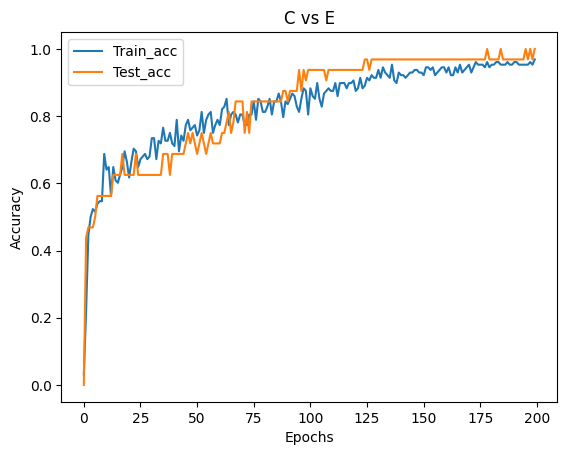

In [33]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('C vs E')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train_acc','Test_acc'],loc='best')
plt.show()

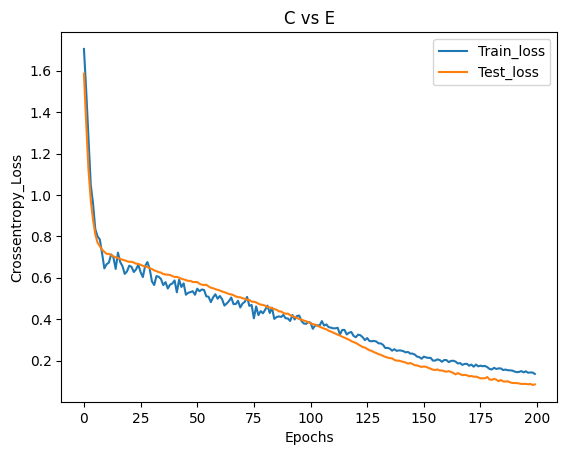

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('C vs E')
plt.xlabel('Epochs')
plt.ylabel('Crossentropy_Loss')
plt.legend(['Train_loss','Test_loss'],loc='best')
plt.show()

In [35]:
score, acc = model.evaluate(x_test, y_test,
                            batch_size=4)
print('Test score:', score)
print('Test accuracy:', acc)

10/10 [==============================] - 0s 6ms/step - loss: 0.1553 - sparse_categorical_accuracy: 0.9500
Test score: 0.15528717637062073
Test accuracy: 0.949999988079071


C:\Users\Sandeep\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


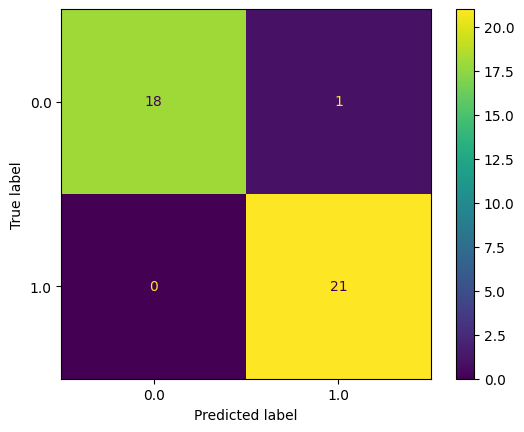

In [36]:
clf = SVC(random_state=0)
clf.fit(X_train, Y_train)
predictions = clf.predict(X_test)
cm = confusion_matrix(Y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [38]:
print('Precision: %.3f' % precision_score(y_test, predictions))
print('Recall: %.3f' % recall_score(y_test, predictions))
print('Accuracy: %.3f' % accuracy_score(y_test, predictions))
print('F1 Score: %.3f' % f1_score(y_test, predictions))

Precision: 0.955
Recall: 1.000
Accuracy: 0.975
F1 Score: 0.977
